<a href="https://colab.research.google.com/github/yunjinchoidev/ai/blob/main/%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A7%91_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
boston = load_boston()
df_boston = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df_boston.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
pwd

'/content'

In [5]:
X = boston.data
y = boston.target

In [6]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [7]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [10]:
model = Sequential()

model.add(Dense(64, input_shape=(13,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [11]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, batch_size=32, 
                    epochs=500, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
12/12 [==============================] - 3s 18ms/step - loss: 578.1749 - mae: 22.2431 - mse: 578.1749 - val_loss: 599.4696 - val_mae: 22.6080 - val_mse: 599.4696
Epoch 2/500
12/12 [==============================] - 0s 6ms/step - loss: 554.9378 - mae: 21.6983 - mse: 554.9378 - val_loss: 577.0042 - val_mae: 22.0872 - val_mse: 577.0042
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 532.1930 - mae: 21.1411 - mse: 532.1930 - val_loss: 551.2809 - val_mae: 21.4750 - val_mse: 551.2809
Epoch 4/500
12/12 [==============================] - 0s 6ms/step - loss: 503.4366 - mae: 20.4080 - mse: 503.4366 - val_loss: 515.8383 - val_mae: 20.6046 - val_mse: 515.8383
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 462.9752 - mae: 19.3387 - mse: 462.9752 - val_loss: 465.4078 - val_mae: 19.2923 - val_mse: 465.4078
Epoch 6/500
12/12 [==============================] - 0s 4ms/step - loss: 405.6393 - mae: 17.7230 - mse: 405.6393 - val_loss: 395.1846 

In [14]:
model.evaluate(X_test, y_test, verbose=0)

[19.07563018798828, 2.422417640686035, 19.07563018798828]

In [15]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [16]:
# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 
print("R2 score: {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error: 19.08
R2 score: 0.78


Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

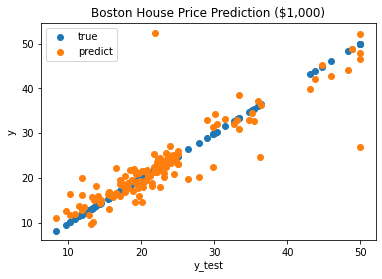

In [17]:
plt.scatter(y_test, y_test, label='true')
plt.scatter(y_test, y_pred, label='predict')
plt.xlabel('y_test')
plt.ylabel('y')
plt.legend()
plt.title('Boston House Price Prediction ($1,000)')

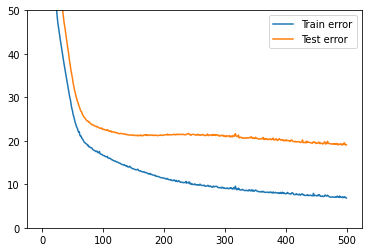

In [18]:
plt.plot(history.history['mse'], label='Train error')
plt.plot(history.history['val_mse'], label='Test error')
plt.ylim([0, 50])
plt.legend()

In [19]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [20]:
regr.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = regr.predict(X_test)

In [22]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [ -8.15984155   3.3728752   -0.24325712   1.93724268  -7.73714796
  23.18245582  -1.33386269 -13.42627585   6.00484395  -6.06577927
  -8.92501137   3.4034565  -15.61979024]
Intercept: 
 25.228208072612457


In [23]:
# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 
print("R2 score: {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error: 24.14
R2 score: 0.75


In [24]:
y_test.shape, y_pred.shape

((127,), (127,))

Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

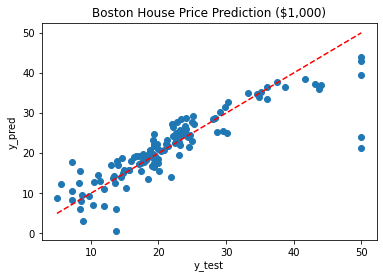

In [25]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Boston House Price Prediction ($1,000)')